In [84]:
%run ego.py
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
from sklearn.externals import joblib

In [86]:
%run preprocess.py

In [87]:
pre = Preprocess(pca_model='eco_full_pca.pkl', all_dat='all_games.pkl')
#pre.get_json("alluser_control.json")

In [88]:
#pre.train_pca()

X, y = pre.ready_player_one(2)

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)

In [89]:
X.shape

(33, 30)

In [90]:
rKrig = Kriging(np.ones(30))
rKrig.fit(X,y)


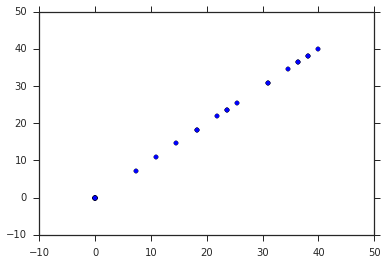

In [91]:
plt.scatter(rKrig.yhat(X), y)

In [92]:
err =np.abs(rKrig.yhat(X) - y)
np.sum(err>0.01)

0

In [93]:
np.argmax(err)

15

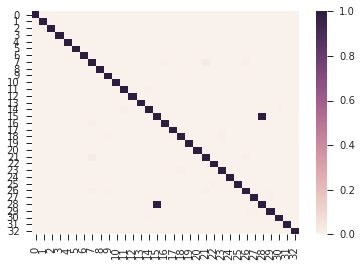

In [94]:
import seaborn as sns
sns.heatmap(rKrig.R)

In [95]:
scores = []
for i in np.logspace(0, 2, num=150, base=10):
    scores += [rKrig.obj(np.ones(30)/i)]

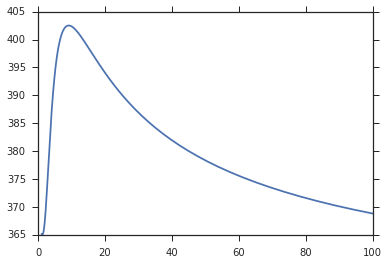

In [96]:
plt.plot(np.logspace(0, 2, num=150, base=10), scores)

In [ ]:
scores = []
for i in np.linspace(-1.5, 1, num=90):
    sig = np.zeros(30)
    print i
    sig[7] = 2.2448718969750616 + i
    #sig[23] = 1.5372117405542511 + i
    scores += [rKrig.obj(sig)]
plt.plot(np.linspace(-1.5, 1, num=90), scores)

In [ ]:
sns.heatmap(X)

In [24]:
np.argmax(scores), np.logspace(-0,2, num=150, base=10)[72]

(72, 9.2564178897127807)

In [12]:
top6 = [78, 122, 166, 70, 67, 69] #best players
m1, m2, m3, m4, m5, m6 = [pre.full_tab.userid.values==i for i in top6]
masks = [m1, m2, m3, m4, m5, m6]
p1=pre.all_dat[masks[0]]
p1_score=pre.full_tab["rem_nrg"].values[masks[0]]

##### 

In [ ]:
np.sum(np.abs(p1[157] - p1[156]))

In [ ]:
rKrig.obj(1/np.ones(30)/19.89105041427495)

In [13]:
import pickle
best_sig = pickle.load( open( "sigma.pickle" ) )

In [14]:
rKrig.obj(best_sig)



623.01614056729204

In [41]:
from scipy.sparse import diags, linalg, issparse, csc_matrix

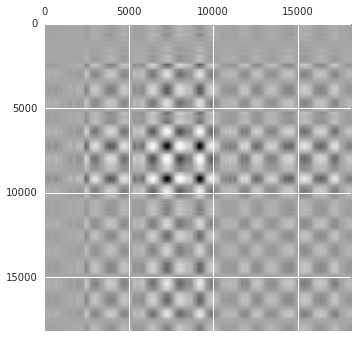

In [44]:
sig = np.zeros(30)
sig[20] = 4.2117034102629782

A = pre.pca.components_
Std_inv = diags([1/scale.std_], [0])
vis = A.T.dot(Std_inv.dot(np.diag(sig).dot(Std_inv.dot(A))))
plt.matshow(vis)

#np.savetxt('visualize_this.txt', vis)

In [ ]:
issparse(vis)
from numpy import ma
x1 = ma.masked_inside(vis, -1e-6, 1e-6)
vis_sp = csc_matrix(ma.filled(x1, 0))
issparse(vis_sp)
#sns.distplot(vis.flatten())

In [ ]:
plt.plot(np.diag(vis))
plt.axhline(y=1e-6, xmin=0, xmax=15000)
from scipy import io

#io.mmwrite("test.mtx", vis_sp)
#del vis, vis_sp

In [53]:
from scipy.linalg import pinv2, inv
#vis_sp = io.mmread("test.mtx")
visI = pinv2(vis)
#plt.imshow(visI)

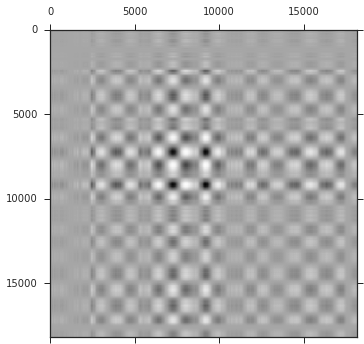

In [55]:
visI.shape
plt.matshow(visI)

In [ ]:
A[:2].sum(axis=0)

In [ ]:
import tables
h5file = tables.openFile('visI.h5', mode='w', title="P2 Solved Variance")
root = h5file.root
h5file.createArray(root, "visI", visI)
h5file.close()

In [ ]:
h5 = tb.open_file('visI.h5', 'r')
a = h5.root.data
row = a[0,:] #only one row gets loaded into memory
print row

In [59]:
data = [0,0,10,20,30,40,50,60,70,80,90,90,90,60,30,0,0,0,0,0,5,10,20,40,60,80,90,90,90,90,70,50,30,30,30,30,30,10,10,10,40,70,70,70,90,90,90,70,50,30,10,0,0,0,40,80,80,80,80,70,60,50,40,30,20,10,0,0,10,20,30,40,50,60,70,80,80,80,70,60,50,40,40,40,60,80,80,80,60,40,20,0,0,0,0,0]

In [ ]:
plt.plot(np.linspace(0,18120,num=96), data)

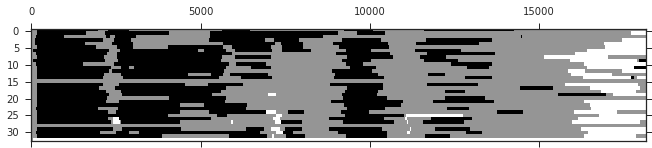

In [57]:
p2=pre.all_dat[masks[1]]
plt.figure(figsize=(15,5))
plt.matshow(p2, aspect=100)

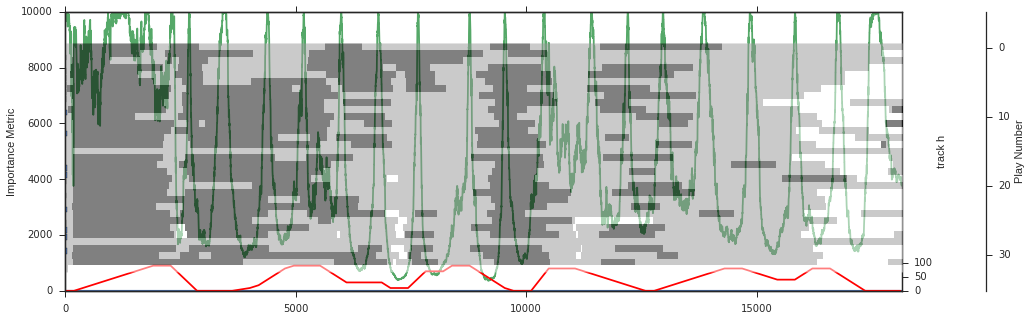

In [61]:
sns.set_style('ticks')
fig, host = plt.subplots(figsize=(15,5))

host.plot(np.diag(visI))

ax2 = host.twinx()
ax1 = host.twinx()
ax1.matshow(p2, aspect=150, alpha=.5)
ax2.plot(np.linspace(0,18120,num=96), data, color='r')
ax2.set_ylim(0,1000)
host.set_xlim(0,18160)
host.set_ylabel("Importance Metric")
ax1.spines["right"].set_position(("axes", 1.1))
ax1.set_ylabel("Play Number")
ax2.set_yticks([0., 50., 100.]);
ax2.set_ylabel("track h")
ax1.barh(range(33), y)
host.plot(1/(np.diag(visI)+.0001))

In [70]:
full_space = pre.pca.transform(pre.all_dat)
bounds = np.zeros((30,2))
for i,n in enumerate(full_space.T):
    bounds[i] = [np.min(n)-1, np.max(n)+1]
bounds
np.savetxt('ego_bounds.txt', bounds, delimiter=',', fmt='%.4e')

In [ ]:
y.max(), y.argmax()

In [77]:
1/np.diag(vis)
import cPickle as pickle
best_sig = pickle.load( open( "sigma.pickle" ) )

In [ ]:
u,v = (np.array([2,2, 2], ndmin=2).T, np.array([0,0, 0], ndmin=2).T)

from scipy.spatial.distance import cdist, mahalanobis, pdist
pdist(np.column_stack((u,v)).T, 'mahalanobis', VI = np.eye(3))**2, mahalanobis(u,v, VI=np.eye(3))**2

In [ ]:
u,v, np.column_stack((u,v))

In [ ]:
np.sqrt(12)

In [ ]:
(u-v).T.dot(np.eye(3).dot(u-v))

In [ ]:
np.argsort(best_sig)

In [37]:
import pickle
best_sig = pickle.load( open( "sigma.pickle" ) )
np.argmax(best_sig), np.max(best_sig)


(20, 4.2117034102629782)

-4.2
-4.06666666667
-3.93333333333
-3.8
-3.66666666667
-3.53333333333
-3.4
-3.26666666667
-3.13333333333
-3.0


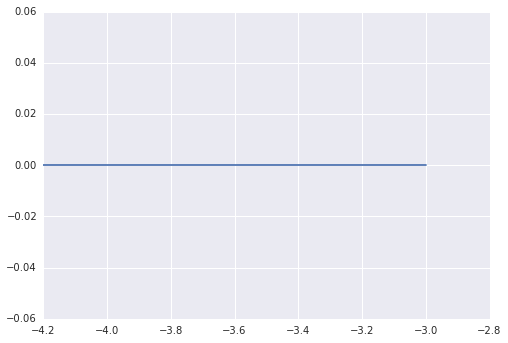

In [38]:
scores = []
for i in np.linspace(-4.2, -3, num=10):
    sig = np.copy(best_sig)
    print i
    sig[20] = 4.2117034102629782 + i
    #sig[23] = 1.5372117405542511 + i
    scores += [rKrig.obj(sig)]
plt.plot(np.linspace(-4.2, -3, num=10), scores)

0.0

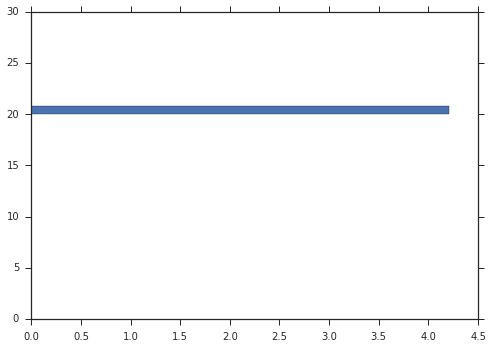

In [51]:
plt.barh(range(30), best_sig)
rKrig.obj(best_sig)

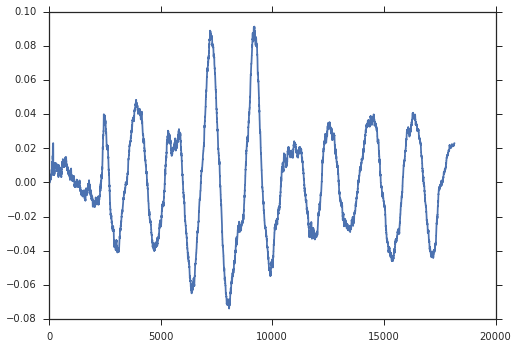

In [52]:
plt.plot(best_sig[20]*A[20])

In [47]:
A.shape

(30, 18160)

In [62]:
from bayes_opt import BayesianOptimization

bo = BayesianOptimization()

TypeError: __init__() takes at least 3 arguments (1 given)

In [80]:
varlist = ['x'+str(i) for i in range(30)]
d = dict.fromkeys(varlist,0)


for n,i in enumerate(varlist):
    d[i] = [0,1000]
d
pickle.dump( d, open( "ego_bds.p", "wb" ) )

In [81]:
pickle.load( open( "ego_bds.p", "rb" ) )

{'x0': [0, 1000],
 'x1': [0, 1000],
 'x10': [0, 1000],
 'x11': [0, 1000],
 'x12': [0, 1000],
 'x13': [0, 1000],
 'x14': [0, 1000],
 'x15': [0, 1000],
 'x16': [0, 1000],
 'x17': [0, 1000],
 'x18': [0, 1000],
 'x19': [0, 1000],
 'x2': [0, 1000],
 'x20': [0, 1000],
 'x21': [0, 1000],
 'x22': [0, 1000],
 'x23': [0, 1000],
 'x24': [0, 1000],
 'x25': [0, 1000],
 'x26': [0, 1000],
 'x27': [0, 1000],
 'x28': [0, 1000],
 'x29': [0, 1000],
 'x3': [0, 1000],
 'x4': [0, 1000],
 'x5': [0, 1000],
 'x6': [0, 1000],
 'x7': [0, 1000],
 'x8': [0, 1000],
 'x9': [0, 1000]}

In [102]:
varlist = ['x'+str(i) for i in range(30)]
c = dict.fromkeys(varlist,0)


for n,i in enumerate(varlist):
    c[i] = [1./j for j in range(1,20)]

pickle.dump( c, open( "ego_explore.p", "wb" ) )

In [103]:
pickle.load( open( "ego_explore.p", "rb" ) )

{'x0': [1.0,
  0.5,
  0.3333333333333333,
  0.25,
  0.2,
  0.16666666666666666,
  0.14285714285714285,
  0.125,
  0.1111111111111111,
  0.1,
  0.09090909090909091,
  0.08333333333333333,
  0.07692307692307693,
  0.07142857142857142,
  0.06666666666666667,
  0.0625,
  0.058823529411764705,
  0.05555555555555555,
  0.05263157894736842],
 'x1': [1.0,
  0.5,
  0.3333333333333333,
  0.25,
  0.2,
  0.16666666666666666,
  0.14285714285714285,
  0.125,
  0.1111111111111111,
  0.1,
  0.09090909090909091,
  0.08333333333333333,
  0.07692307692307693,
  0.07142857142857142,
  0.06666666666666667,
  0.0625,
  0.058823529411764705,
  0.05555555555555555,
  0.05263157894736842],
 'x10': [1.0,
  0.5,
  0.3333333333333333,
  0.25,
  0.2,
  0.16666666666666666,
  0.14285714285714285,
  0.125,
  0.1111111111111111,
  0.1,
  0.09090909090909091,
  0.08333333333333333,
  0.07692307692307693,
  0.07142857142857142,
  0.06666666666666667,
  0.0625,
  0.058823529411764705,
  0.05555555555555555,
  0.05263157